In [10]:
from data_loader.data_loaders import GsdOutcomeDataLoader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec


In [7]:
imaging_dataset_path = '/Users/jk1/stroke_datasets/dataset_files/perfusion_data_sets/noGT_pmaps_15-19_dataset_with_combined_mRS_90_days.npz'
outcome_file_path = '/Users/jk1/temp/scope_test/joined_anon_outcomes_2015_2016_2017_2018_df.xlsx'

In [4]:
data_loader = GsdOutcomeDataLoader(imaging_dataset_path, outcome_file_path, [0,1,2,3], "combined_mRS_0-2_90_days", True, 1, shuffle=True, validation_split=0.0, num_workers=2)

Using channels: ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV']
Preloading the dataset ...
Loading is done



In [8]:
# draw center image on canvas
def visual_add_center_slice(image, i_subj, i_image, gs, image_id=None):
    n_z = image.shape[2]
    center_z = (n_z - 1) // 2
    i_col = i_image
    i_row = i_subj

    # plot image
    ax = plt.subplot(gs[i_row, i_col])
    if image_id is not None: ax.set_title(image_id, fontdict={'fontsize': 10})
    plt.imshow(image[:, :, center_z].T, cmap='gray')
    plt.axis('off')


In [11]:
n_c = 4
n_subj = 165

0 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-3fa5c162',)
1 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-de1a5591',)
2 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-3ca34c4f',)
3 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-ebc36541',)
4 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-43b0f2c3',)
5 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-47a0f42c',)
6 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-f2fdcc74',)
7 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-f860667e',)
8 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-eaaeb102',)
9 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-62cec224',)
10 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-d7a15314',)
11 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-6ae7eed7',)
12 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-e3b8457f',)
13 torch.Size([1, 4, 79, 95, 79]) (79, 95, 79, 4) ('subj-83231fbf',)
14 torch.Size([1, 4, 79, 95, 79]) (79, 95, 7

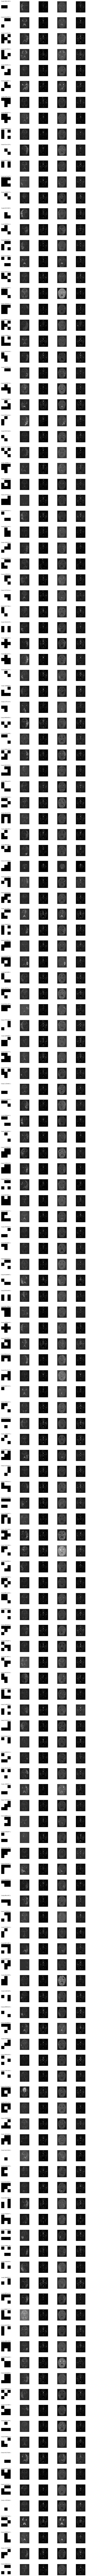

In [13]:
ncol = n_c + 2
nrow = n_subj + 2
figure = plt.figure(figsize=(2*(ncol+1) + 1, 2*(nrow+1)))
gs = gridspec.GridSpec(nrow, ncol,
                       wspace=1, hspace=0.25,
                       top=1. - 0.5 / (nrow + 1), bottom=0.5 / (nrow + 1),
                       left=0.5 / (ncol + 1), right=1 - 0.5 / (ncol + 1))

for batch_idx, (data, target, subj_id) in enumerate(data_loader):
    subj_data = data[0].permute(1, 2, 3, 0).detach().cpu().numpy()
    print(batch_idx, data.shape, subj_data.shape, subj_id)


    visual_add_center_slice(np.random.randint(2, size=(3, 3, 3)), batch_idx, 0, gs, subj_id)

    for channel in range(n_c):
        visual_add_center_slice(subj_data[..., channel], batch_idx, channel + 1, gs, image_id=None)